In [1]:
!pip install pycocotools
import os
from pycocotools.coco import COCO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.8/427.8 kB 6.6 MB/s eta 0:00:00a 0:00:01


In [2]:
# Define the directory where the COCO dataset is stored
dataDir = '/kaggle/input/coco-image-caption'

# Specify the type of data you're working with. 
# 'val2017' refers to the validation data, and 'train2017' would refer to the training data.
dataType = 'val2017'  # or 'train2017' for training data

# Construct the file path for the instances annotations JSON file.
# This file contains information about object instances (bounding boxes, categories, etc.) for the specified data type.
instances_annFile = os.path.join(dataDir, 'annotations_trainval2017/annotations/instances_{}.json'.format(dataType))

# Construct the file path for the captions annotations JSON file.
# This file contains image captions for the specified data type.
captions_annFile = os.path.join(dataDir, 'annotations_trainval2017/annotations/captions_{}.json'.format(dataType))

# Check if the paths for both the instances and captions annotation files are correct.
# The os.path.exists() function returns True if the file exists at the specified path, otherwise False.
print(os.path.exists(instances_annFile))  # Should return True if the instances JSON file is found at the path
print(os.path.exists(captions_annFile))   # Should return True if the captions JSON file is found at the path


True
True


In [3]:
# Initialize COCO API for instance annotations
coco = COCO(instances_annFile)

# Initialize COCO API for caption annotations
coco_caps = COCO(captions_annFile)

# Get image ids
ids = list(coco.anns.keys())
print(f"Number of annotations: {len(ids)}")


loading annotations into memory...
Done (t=1.05s)
creating index...
index created!
loading annotations into memory...
Done (t=0.11s)
creating index...
index created!
Number of annotations: 36781


http://images.cocodataset.org/val2017/000000053994.jpg


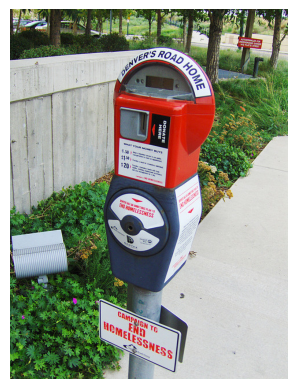

A pretty red white and blue parking meter by some shrubs.
A parking meter with a sidewalk and fence in the background. 
A parking meter has a sign promoting the end to homelessness.
A parking meter is on a sidewalk next to some green bushes.
A parking meter that has a sign to end homelessness on it.


In [4]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
%matplotlib inline

# pick a random image and obtain the corresponding URL
ann_id = np.random.choice(ids)
img_id = coco.anns[ann_id]['image_id']
img = coco.loadImgs(img_id)[0]
url = img['coco_url']

# print URL and visualize corresponding image
print(url)
I = io.imread(url)
plt.axis('off')
plt.imshow(I)
plt.show()

# load and display captions
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)

In [5]:
!pip install nltk
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Caption: A pretty red white and blue parking meter by some shrubs.
Tokens: ['a', 'pretty', 'red', 'white', 'and', 'blue', 'parking', 'meter', 'by', 'some', 'shrubs', '.']
Caption: A parking meter with a sidewalk and fence in the background. 
Tokens: ['a', 'parking', 'meter', 'with', 'a', 'sidewalk', 'and', 'fence', 'in', 'the', 'background', '.']
Caption: A parking meter has a sign promoting the end to homelessness.
Tokens: ['a', 'parking', 'meter', 'has', 'a', 'sign', 'promoting', 'the', 'end', 'to', 'homelessness', '.']
Caption: A parking meter is on a sidewalk next to some green bushes.
Tokens: ['a', 'parking', 'meter', 'is', 'on', 'a', 'sidewalk', 'next', 'to', 'some', 'green', 'bushes', '.']
Caption: A parking meter that has a sign to end homelessness on it.
Tokens: ['a', 'parking', 'meter', 'that', 'has', 'a', 'sign', 'to', 'end', 'homelessness', 'on', 'it', '.']

Most common words:
[('a', 9), ('parking', 5), ('meter', 5), ('.', 5), ('to', 3), ('and', 2), ('some', 2), ('sidewalk'

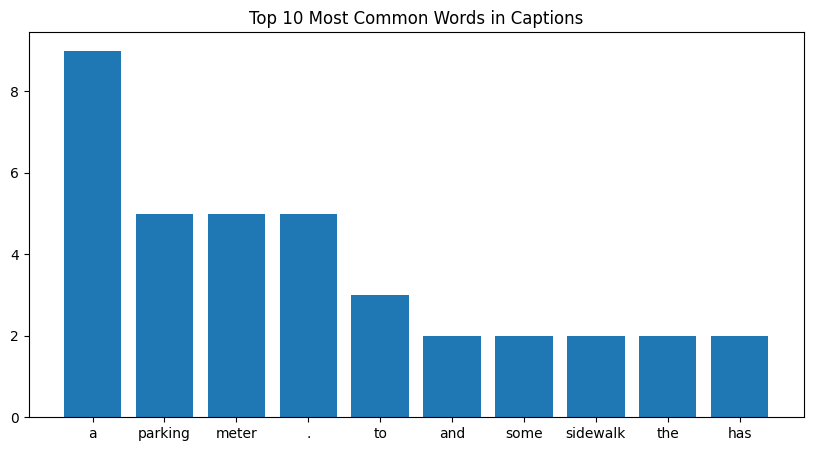

In [6]:
from nltk.tokenize import word_tokenize

# Tokenize the captions
for ann in anns:
    caption = ann['caption']
    tokens = word_tokenize(caption.lower())  # Tokenizing each caption and converting to lowercase
    print(f"Caption: {caption}")
    print(f"Tokens: {tokens}")

# Collect all tokens to analyze word frequency
from collections import Counter
# 
all_tokens = []
for ann in anns:
    caption = ann['caption']
    tokens = word_tokenize(caption.lower())
    all_tokens.extend(tokens)

# Count word frequencies
word_freq = Counter(all_tokens)
print(f"\nMost common words:\n{word_freq.most_common(10)}")

# Visualize the word frequencies
words, counts = zip(*word_freq.most_common(10))
plt.figure(figsize=(10,5))
plt.bar(words, counts)
plt.title('Top 10 Most Common Words in Captions')
plt.show()


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Caption: A pretty red white and blue parking meter by some shrubs.
Preprocessed Tokens: ['pretty', 'red', 'white', 'blue', 'parking', 'meter', 'shrubs']
Caption: A parking meter with a sidewalk and fence in the background. 
Preprocessed Tokens: ['parking', 'meter', 'sidewalk', 'fence', 'background']
Caption: A parking meter has a sign promoting the end to homelessness.
Preprocessed Tokens: ['parking', 'meter', 'sign', 'promoting', 'end', 'homelessness']
Caption: A parking meter is on a sidewalk next to some green bushes.
Preprocessed Tokens: ['parking', 'meter', 'sidewalk', 'next', 'green', 'bushes']
Caption: A parking meter that has a sign to end homelessness on it.
Preprocessed Tokens: ['parking', 'meter', 'sign', 'end', 'homelessness']

Most common preprocessed words:
[('parking', 5), ('meter', 5), ('sidewalk', 2), ('sign', 2), ('end', 2), ('homelessness', 2), 

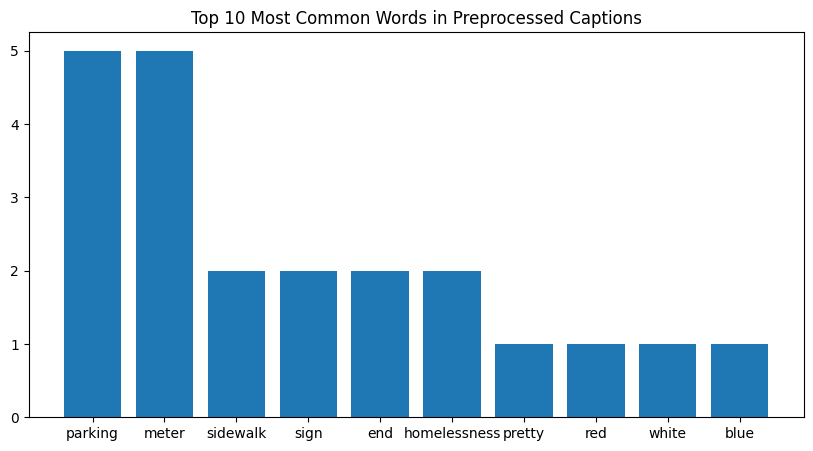

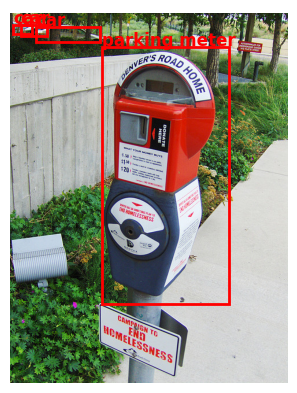


Objects detected in the image:
- parking meter
- car
- car
- car

Relationship between objects and captions:

Caption: A pretty red white and blue parking meter by some shrubs.
Objects mentioned in caption:
  - parking meter (mentioned)
  - car (not mentioned)
  - car (not mentioned)
  - car (not mentioned)

Caption: A parking meter with a sidewalk and fence in the background. 
Objects mentioned in caption:
  - parking meter (mentioned)
  - car (not mentioned)
  - car (not mentioned)
  - car (not mentioned)

Caption: A parking meter has a sign promoting the end to homelessness.
Objects mentioned in caption:
  - parking meter (mentioned)
  - car (not mentioned)
  - car (not mentioned)
  - car (not mentioned)

Caption: A parking meter is on a sidewalk next to some green bushes.
Objects mentioned in caption:
  - parking meter (mentioned)
  - car (not mentioned)
  - car (not mentioned)
  - car (not mentioned)

Caption: A parking meter that has a sign to end homelessness on it.
Objects men

In [7]:
import string
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Tokenize the captions and remove punctuation and stopwords
def preprocess_caption(caption):
    tokens = word_tokenize(caption.lower())  # Tokenize and lowercase
    tokens = [word for word in tokens if word not in string.punctuation]  # Remove punctuation
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return tokens

# Preprocess and display the captions
for ann in anns:
    caption = ann['caption']
    tokens = preprocess_caption(caption)
    print(f"Caption: {caption}")
    print(f"Preprocessed Tokens: {tokens}")

# Collect all tokens after preprocessing
preprocessed_tokens = []
for ann in anns:
    caption = ann['caption']
    tokens = preprocess_caption(caption)
    preprocessed_tokens.extend(tokens)

# Count word frequencies again after preprocessing
word_freq_preprocessed = Counter(preprocessed_tokens)
print(f"\nMost common preprocessed words:\n{word_freq_preprocessed.most_common(10)}")

# Visualize the word frequencies after preprocessing
words, counts = zip(*word_freq_preprocessed.most_common(10))
plt.figure(figsize=(10,5))
plt.bar(words, counts)
plt.title('Top 10 Most Common Words in Preprocessed Captions')
plt.show()

# Visualize the objects in the image using bounding boxes
# Get all annotation IDs for the image (objects)
annIds_objects = coco.getAnnIds(imgIds=img['id'], iscrowd=False)
anns_objects = coco.loadAnns(annIds_objects)

# Visualize the image with bounding boxes
plt.imshow(I)
plt.axis('off')

# Loop over each object annotation to draw bounding boxes
for obj in anns_objects:
    bbox = obj['bbox']  # [x, y, width, height]
    category_id = obj['category_id']
    category = coco.loadCats(category_id)[0]['name']  # Get the category name (e.g., "person", "dog")

    # Draw bounding box (x, y, width, height)
    rect = plt.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], fill=False, edgecolor='red', linewidth=2)
    plt.gca().add_patch(rect)
    
    # Label each object with its category name
    plt.text(bbox[0], bbox[1] - 2, category, color='red', fontsize=12, weight='bold')

plt.show()

# Display the objects detected in the image
print("\nObjects detected in the image:")
for obj in anns_objects:
    category = coco.loadCats(obj['category_id'])[0]['name']
    print(f"- {category}")

# Explore relationships between objects and captions (basic)
print("\nRelationship between objects and captions:")
for ann in anns:
    caption = ann['caption']
    print(f"\nCaption: {caption}")
    print("Objects mentioned in caption:")
    for obj in anns_objects:
        category = coco.loadCats(obj['category_id'])[0]['name']
        if category in caption.lower():
            print(f"  - {category} (mentioned)")
        else:
            print(f"  - {category} (not mentioned)")
